<a href="https://colab.research.google.com/github/taposihowlader123/Student-_performance/blob/main/Customer_Churn_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Customer Churn Ditection Project

In [1]:
## Import Some Importent Liberys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data file  and store in a veriable
data=pd.read_csv("Customer_Churn_dataset.csv")
# Print Dataset
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


## Exploratory Data Analysis

In [3]:
#Data information what are the features in there
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
#Data describe
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [5]:
# Checking missing values and there sum
data.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [6]:
#Check missing values percentage
(data.isna().sum()/len(data.isna())*100).round(2)

,0
CustomerID,0.00
Churn,0.00
Tenure,4.69
PreferredLoginDevice,0.00
CityTier,0.00
WarehouseToHome,4.46
PreferredPaymentMode,0.00
Gender,0.00
HourSpendOnApp,4.53
NumberOfDeviceRegistered,0.00


In [9]:
#Null Value Imputation( handling)
Num_Col=['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
for column in list(Num_Col):
  data[column].fillna(data[column].median(),inplace=True)
 # data[column].fillna(data[column].mean(),inplace=True)
#data

/tmp/ipython-input-252103543.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(),inplace=True)


In [10]:
# Now check again for null values
data.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


In [ ]:
# #Check for columns
# for col in data.columns:
#   print(col)

In [11]:
#Check for Unique values
for col1 in data.columns:
  print(col1)
  print(data[col1].unique())
  print("")


CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13

In [12]:
# Check counts for unique values
data['PreferredLoginDevice'].value_counts()

,count
PreferredLoginDevice,
Mobile Phone,2765
Computer,1634
Phone,1231


In [19]:
# Mobile Phone and Phone are similar object so we are merging them
category={'Phone':'Mobile Phone'}
data['PreferredLoginDevice']=data['PreferredLoginDevice'].replace(category)
print(data['PreferredLoginDevice'].value_counts())


PreferredLoginDevice
Mobile Phone    3996
1               1634
Name: count, dtype: int64


In [23]:
# Set values
data.replace({'PreferredLoginDevice':{'Computer':1,'Mobile Phone':0}},inplace=True)
print(data['PreferredLoginDevice'].unique())

[0 1]


In [24]:
# Likewise, payment mode
data['PreferredPaymentMode'].value_counts()

,count
PreferredPaymentMode,
Debit Card,2314
Credit Card,1501
E wallet,614
UPI,414
COD,365
CC,273
Cash on Delivery,149


##Basic Information

##Churn Distribution

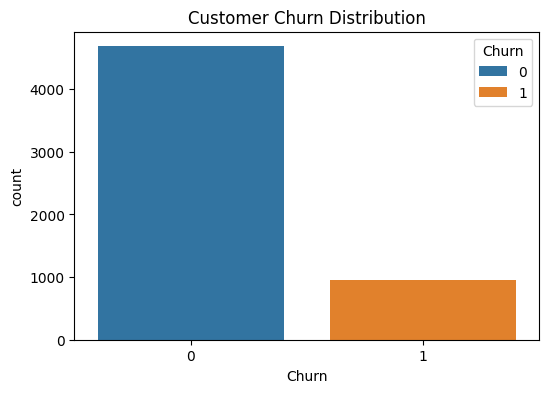

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data,hue='Churn')
plt.title('Customer Churn Distribution')
plt.show()

#Gender vs Churn


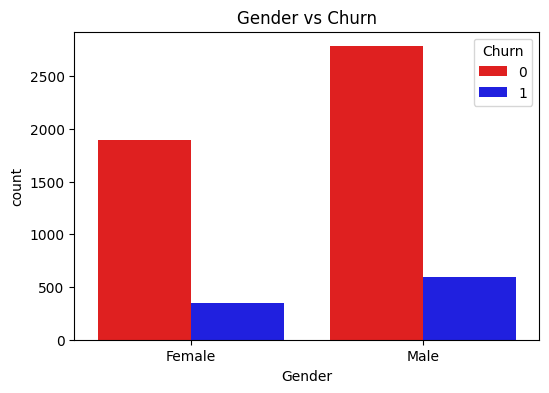

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Churn', data=data, palette=['red','blue'])
plt.title('Gender vs Churn')
plt.show()

#Tenure vs Churn


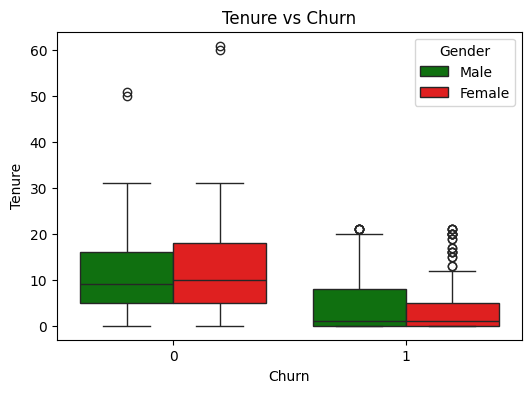

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Tenure', data=data, palette=['green','red'],hue='Gender')
plt.title('Tenure vs Churn')
plt.show()

#Payment Mode vs Churn


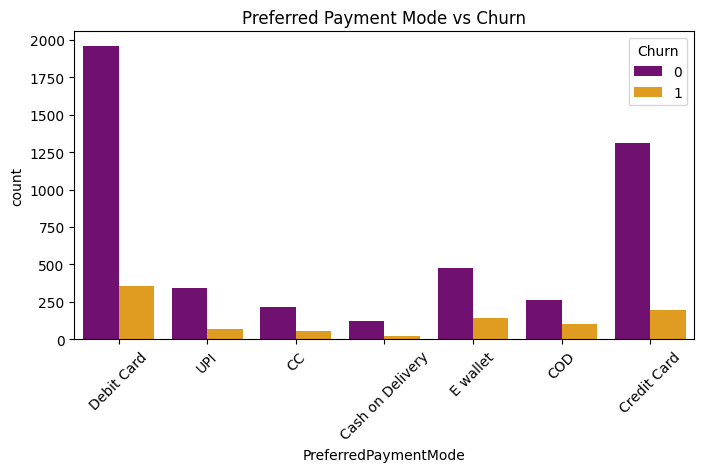

In [60]:

if 'PreferredPaymentMode' in data.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data,x='PreferredPaymentMode', hue='Churn', palette=['purple','orange'])
    plt.xticks(rotation=45)
    plt.title('Preferred Payment Mode vs Churn')
    plt.show()

#Hours Spent on App vs Churn


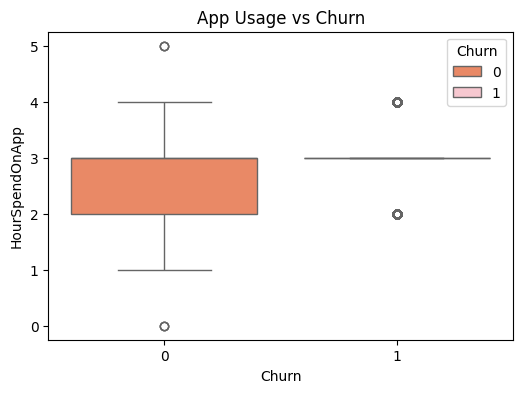

In [64]:
plt.figure(figsize=(6,4))
sns.boxplot( data=data,x='Churn', y='HourSpendOnApp', hue='Churn',palette=['coral','pink'])
plt.title('App Usage vs Churn')
plt.show()


In [65]:
#Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

In [67]:
print("Numeric columns used for correlation:")
numeric_data.columns.tolist()

Numeric columns used for correlation:


['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [69]:
#Compute correlation matrix
corr_matrix = numeric_data.corr()
corr_matrix

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.035096,0.002508,0.003239,0.065120,0.580301,0.411098,-0.033146,0.160814,-0.009944,0.110825,0.232656,0.133604,0.098965,0.217173
Churn,-0.019083,1.000000,-0.337831,0.051099,0.084703,0.069544,0.018816,0.107939,0.105481,0.043931,0.250188,-0.007075,-0.001430,-0.024038,-0.155871,-0.154161
Tenure,0.035096,-0.337831,1.000000,-0.040605,-0.057895,-0.012191,-0.017282,-0.020657,-0.014452,0.235076,-0.020535,-0.005542,0.101535,0.165339,0.174378,0.468178
PreferredLoginDevice,0.002508,0.051099,-0.040605,1.000000,-0.002476,0.023066,-0.019524,0.021096,-0.036049,-0.025863,-0.001327,0.012610,0.013195,0.014327,-0.002251,-0.047822
CityTier,0.003239,0.084703,-0.057895,-0.002476,1.000000,0.013576,-0.009921,0.027934,-0.011554,-0.029440,0.003375,-0.028890,0.022629,0.033551,0.010214,0.055698
WarehouseToHome,0.065120,0.069544,-0.012191,0.023066,0.013576,1.000000,0.064069,0.023020,0.007524,-0.008305,0.026825,0.038311,0.002675,0.000354,0.020253,0.000090
HourSpendOnApp,0.580301,0.018816,-0.017282,-0.019524,-0.009921,0.064069,1.000000,0.305048,0.030937,0.139541,0.006607,0.099305,0.187166,0.102053,0.061213,0.114268
NumberOfDeviceRegistered,0.411098,0.107939,-0.020657,0.021096,0.027934,0.023020,0.305048,1.000000,-0.017228,0.084997,0.003407,0.065714,0.152065,0.099790,0.007350,0.137396
SatisfactionScore,-0.033146,0.105481,-0.014452,-0.036049,-0.011554,0.007524,0.030937,-0.017228,1.000000,0.053583,-0.031115,-0.027121,0.017423,0.018166,0.031985,0.003429
NumberOfAddress,0.160814,0.043931,0.235076,-0.025863,-0.029440,-0.008305,0.139541,0.084997,0.053583,1.000000,-0.026399,0.012161,0.036985,-0.013970,-0.067180,0.186802


#Plot heatmap safely


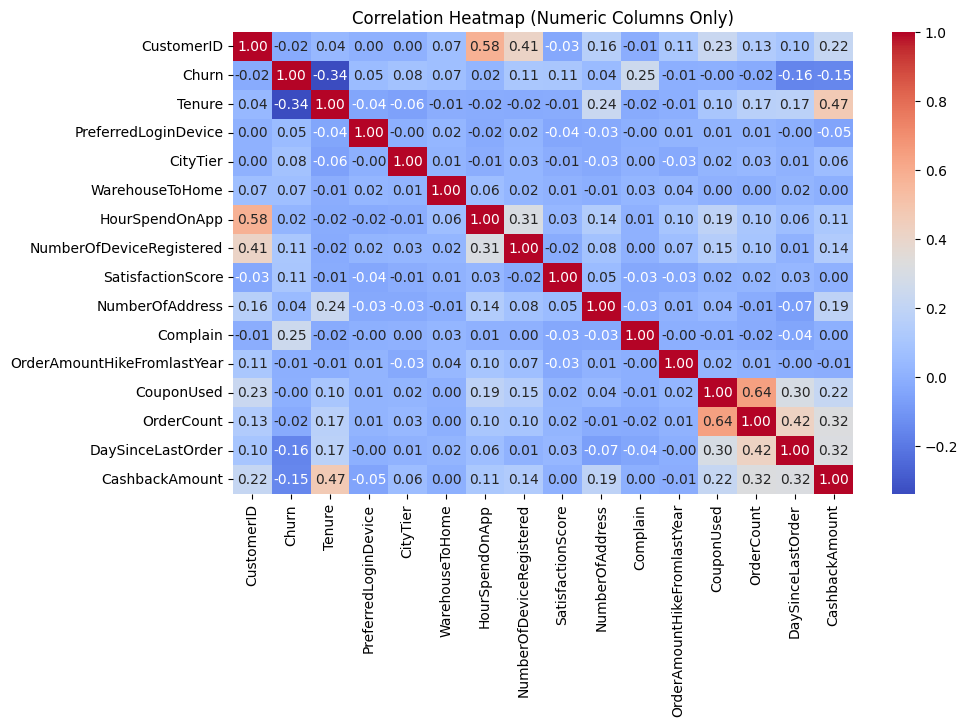

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

#Relationship between Tenure & OrderCount


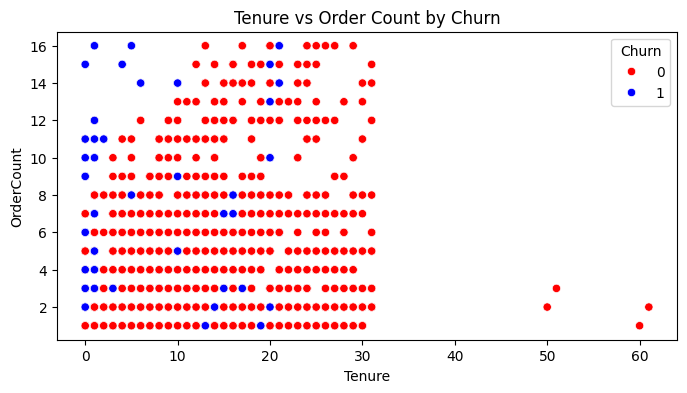

In [78]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Tenure', y='OrderCount', hue='Churn', data=data, palette=['red','blue'])
plt.title('Tenure vs Order Count by Churn')
plt.show()

#Key Insights

##Customers with shorter Tenure are more likely to churn.
##Lower app usage (HourSpendOnApp) is linked to higher churn.
##Payment preference and device type may affect retention.
##Correlation map helps identify numeric relationships.